In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':2000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':.5,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Equities","Domestic'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-26 to 2019-06-26 - 86'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-shrp'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
PGX,64,0.801550,0.430560,1.474552,1.237116
SPLV,64,2.047368,1.367757,1.375025,2.660443
USMV,64,2.096795,1.684330,1.145933,2.180427
PFF,64,0.800996,0.671894,0.944091,1.003023
MTUM,64,1.999969,2.004367,0.914654,2.859384
XMLV,64,1.225758,1.527458,0.693368,3.688597
VIG,64,1.594973,2.414588,0.591532,4.634193
VOT,64,1.545600,3.106564,0.443877,5.627908
VOOG,64,1.389283,2.839960,0.430505,6.391444


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['PGX'] -0.4271286042448976 0.6 0.24742325575833032 1.4745518600032281
['PGX', 'SPLV'] -0.5453048111280064 0.48972787663328 0.38975592885216226 1.4247886166134487


['PGX', 'SPLV']

In [20]:
quote.setup_mask(['PGX', 'SPLV'])
quote.optimize(21, 1.6, .9)

({'PGX': 0.19, 'SPLV': 0.71}, 1.6, 1.0083)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
PGX,64.0,0.801550,0.430560,-0.362675,0.515299,0.903745,1.080485,1.719729,1.474552,1.237116
Portfolio,64.0,1.799837,1.141490,-0.568968,1.128444,1.715720,2.543455,4.224063,1.430735,2.207128
SPLV,64.0,2.047368,1.367757,-0.950251,1.191957,1.930746,2.964536,4.955302,1.375025,2.660443


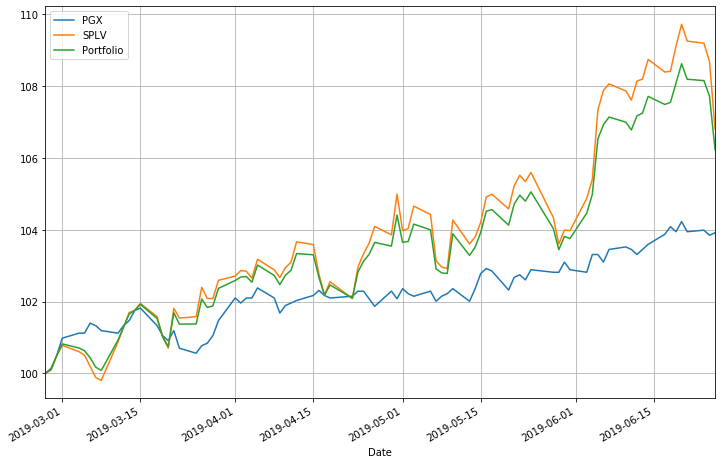

In [16]:
%pylab inline
quote.setup_mask(['PGX', 'SPLV'])
quote.graph(21, {'PGX': .2, 'SPLV': .8})